In [60]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def plot_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [62]:
def coord_cromaticas(image):
    B,G,R = cv2.split(image)
    coord_img = image.copy()
    cols, rows, _ = image.shape
    for col in range(cols):
        for row in range(rows):
            b = int(B[col][row])
            g = int(G[col][row])
            r = int(R[col][row])

            if (b + g + r) == 0:
                coord_img[col][row] = [0, 0, 0]
            else:
                coord_img[col][row] = [(float(b/(b + g + r))*255),
                                 (float(g/(b + g + r))*255),
                                 (float(r/(b + g + r))*255)]
    return coord_img

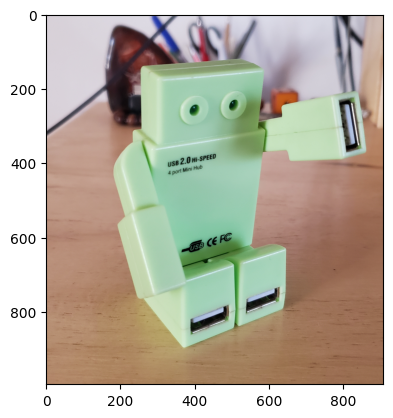

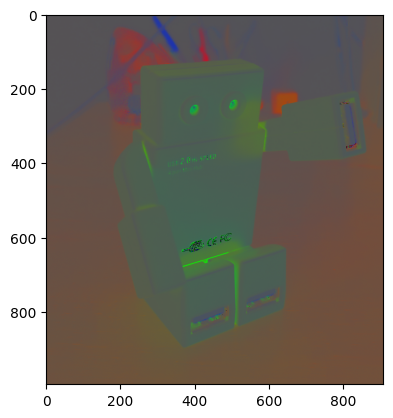

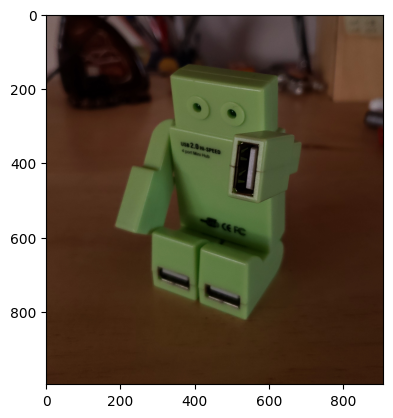

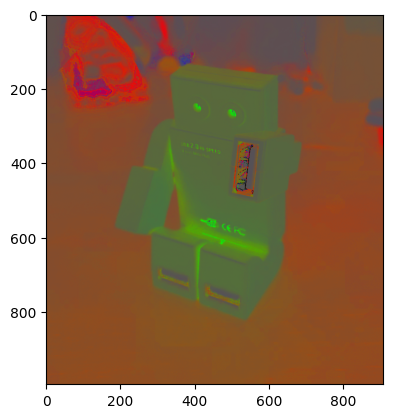

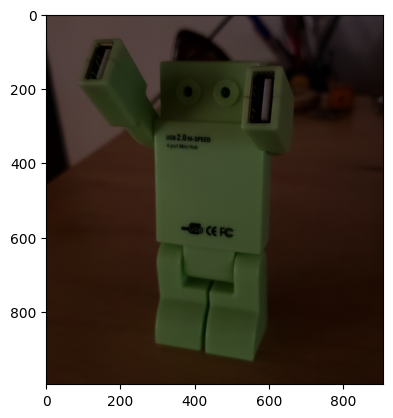

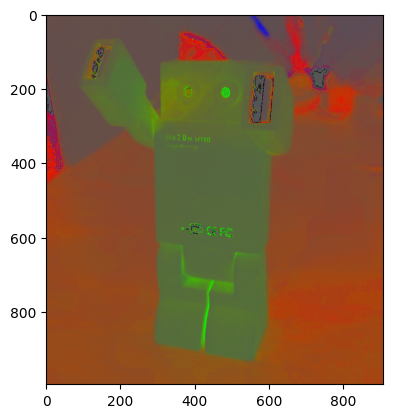

In [63]:
import os

for file in os.listdir('coord_cromaticas'):
    image_path = 'coord_cromaticas/' + file
    image = cv2.imread(image_path)
    plot_image(image)
    coord_img = coord_cromaticas(image)
    plot_image(coord_img)

In [64]:
def white_patch(image):
    plot_image(image)

    B,G,R = cv2.split(image)

    maxr = np.amax(R)
    maxb = np.amax(B)
    maxg = np.amax(G)
    print(maxr,maxg,maxb)

    sr = float(255)/maxr
    sg = float(255)/maxg
    sb = float(255)/maxb
    print(sr,sg,sb)

    R = (R*sr).astype('uint8')
    G = (G*sg).astype('uint8')
    B = (B*sb).astype('uint8')

    return cv2.merge([B,G,R])

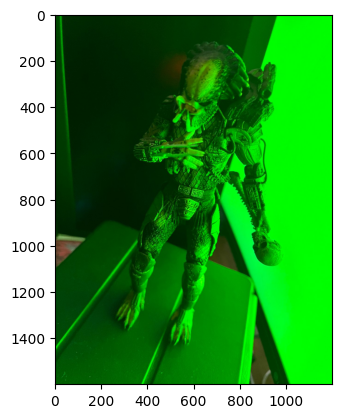

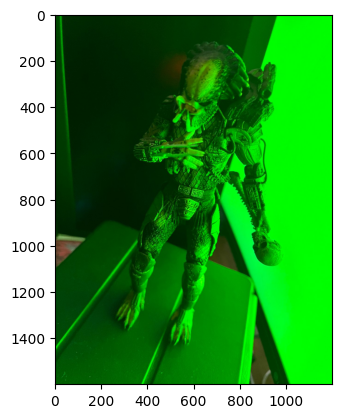

170 255 172
1.5 1.0 1.4825581395348837


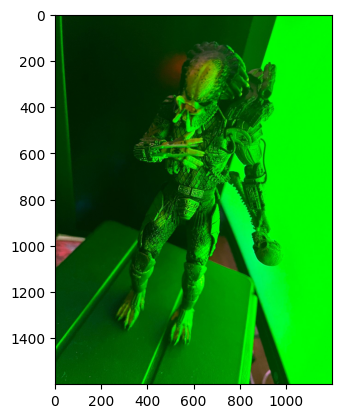

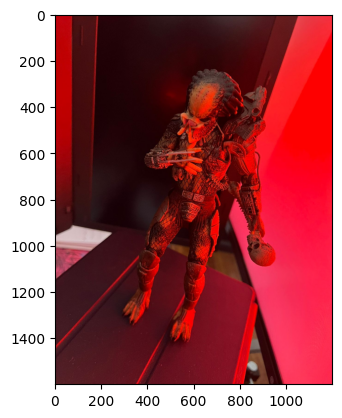

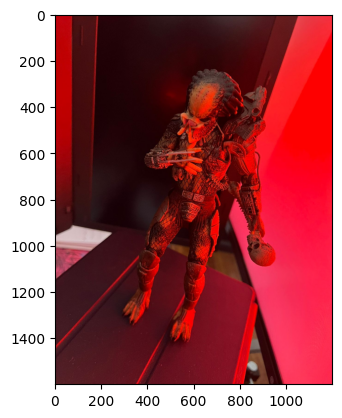

255 201 203
1.0 1.2686567164179106 1.2561576354679802


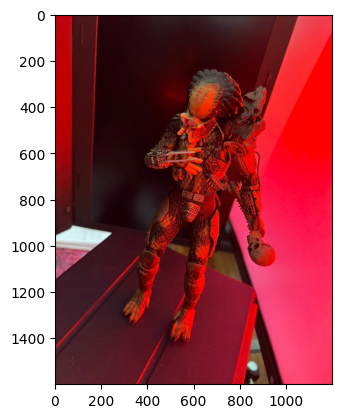

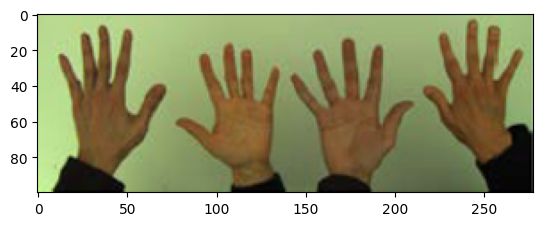

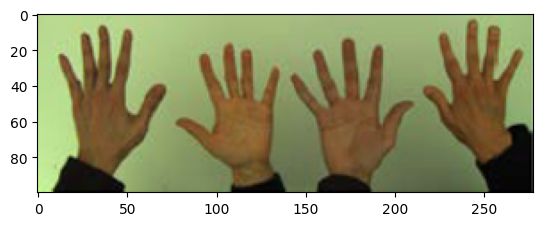

210 250 171
1.2142857142857142 1.02 1.4912280701754386


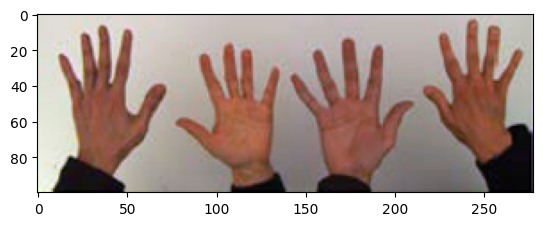

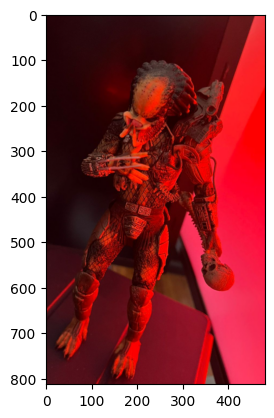

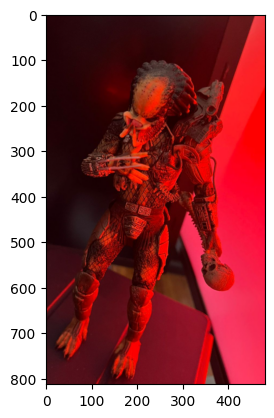

255 134 122
1.0 1.9029850746268657 2.0901639344262297


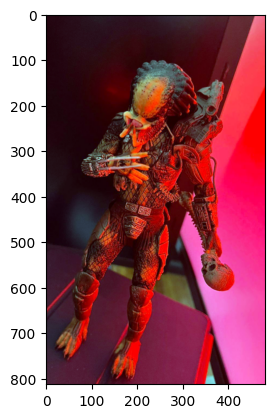

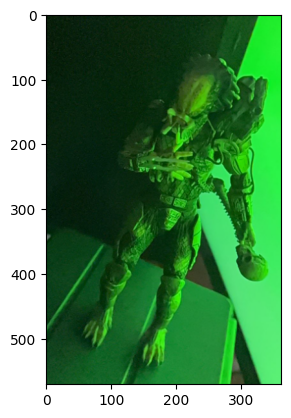

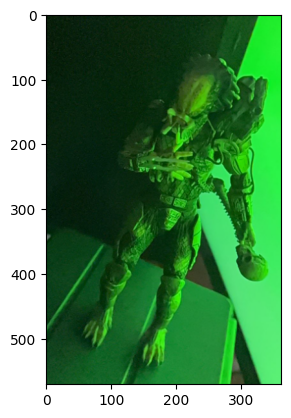

126 252 155
2.0238095238095237 1.0119047619047619 1.6451612903225807


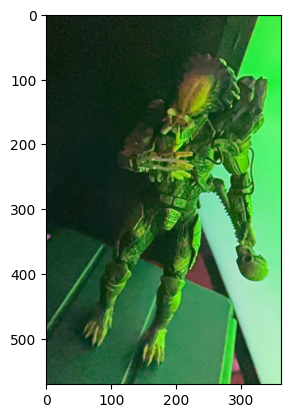

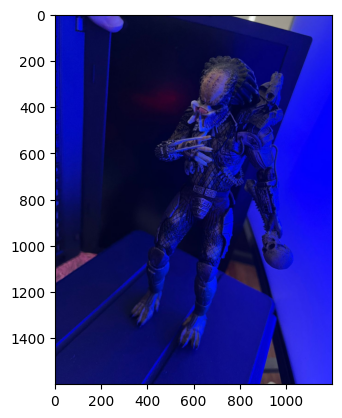

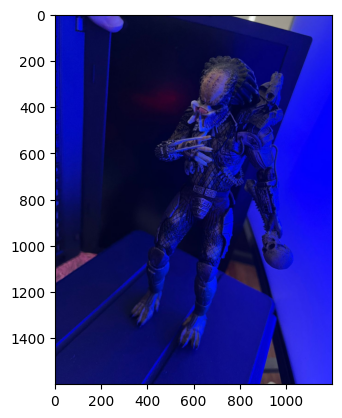

255 255 255
1.0 1.0 1.0


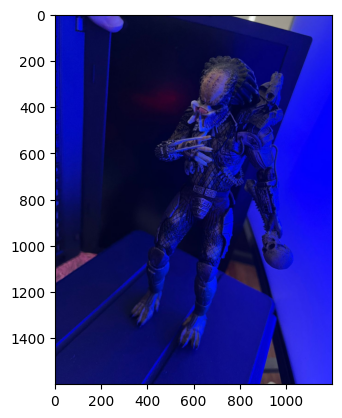

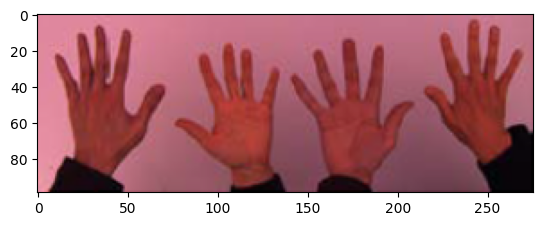

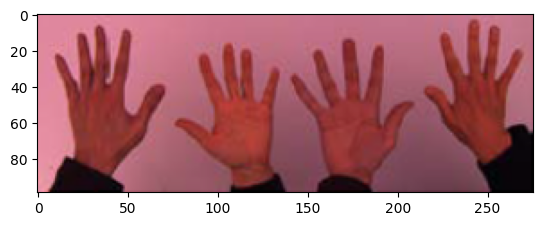

247 157 175
1.0323886639676114 1.624203821656051 1.457142857142857


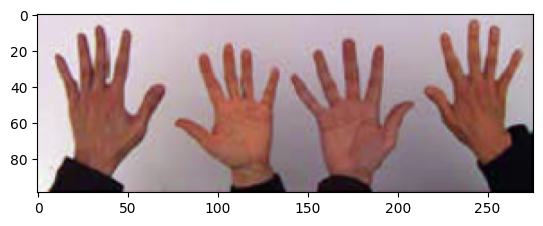

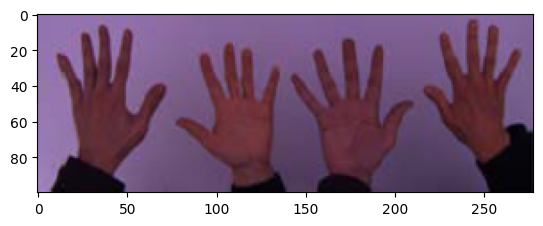

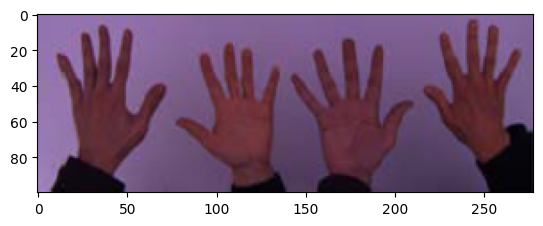

165 138 200
1.5454545454545454 1.8478260869565217 1.275


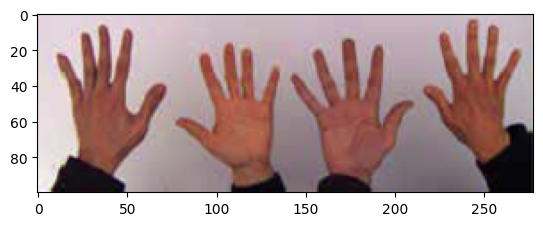

In [65]:
import os

for file in os.listdir('white_patch'):
    image_path = 'white_patch/' + file
    image = cv2.imread(image_path)
    plot_image(image)
    white_patch_img = white_patch(image)
    plot_image(white_patch_img)

In [66]:
def gray_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plot_image(gray)

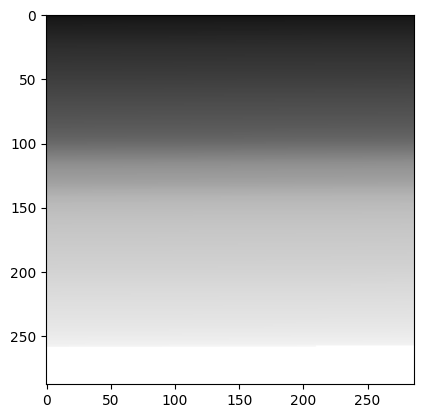

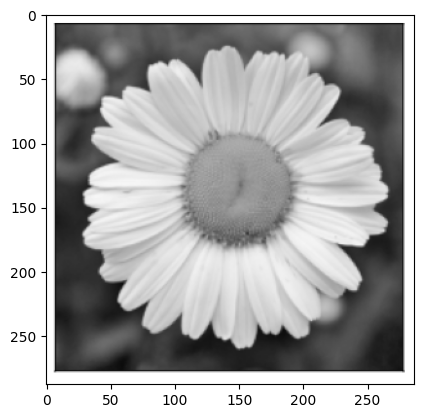

In [67]:
for file in ['img1_tp.png', 'img2_tp.png']:
    gray_image(file)

In [68]:
def hist_gray_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plt.figure()
    plt.xlabel('Bins')
    plt.ylabel('# de pixeles')
    plt.plot(hist)
    plt.show()

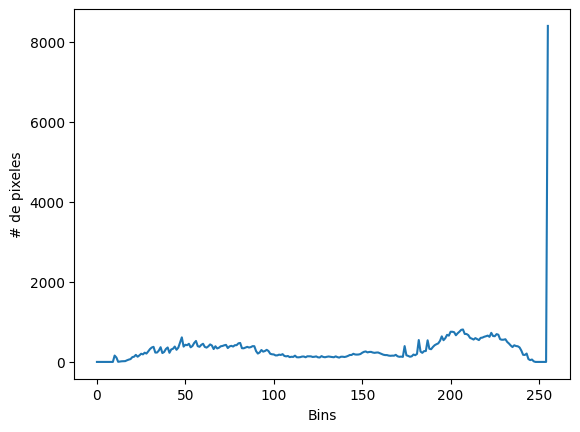

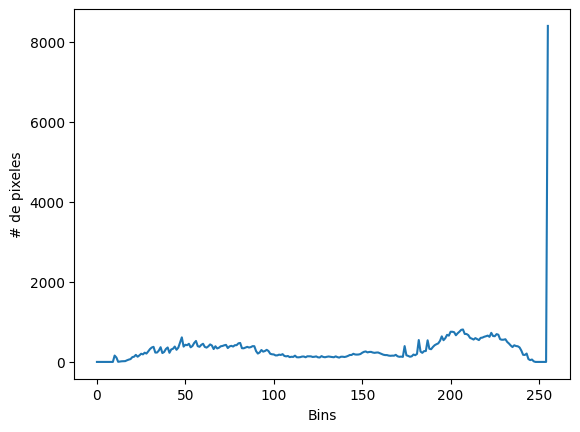

In [69]:
for file in ['img1_tp.png', 'img2_tp.png']:
    hist_gray_image(file)

No se puede usar para entrenar un modelo por que las 2 imagenes me dan como resultado el mismo histograma por que tienen la misma escala de grises y son distintas imagenes.

In [70]:
def hist_color_image(hsv):
    plt.figure()
    hist_b = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    plt.plot(hist_b, color = 'b')
    hist_g = cv2.calcHist([hsv], [1], None, [256], [0, 256])
    plt.plot(hist_g, color = 'g')
    hist_r = cv2.calcHist([hsv], [2], None, [256], [0, 256])
    plt.plot(hist_r, color = 'r')
    plt.xlabel('Bins')
    plt.ylabel('# de pixeles')
    plt.show()

In [78]:
def color_medio(muestra):
    mean = np.mean(muestra, axis=(0,1))
    print(mean)

    muestra = cv2.cvtColor(muestra, cv2.COLOR_HSV2BGR)

    plt.figure()
    plt.imshow(muestra, cmap='gray')
    plt.show()
    return mean

In [79]:
def mascara(muestra, image):
    val_h_medio = color_medio(muestra)[0]
    color_l = (val_h_medio-10, 10, 10)
    color_u = (val_h_medio+10, 150, 150)

    mask = cv2.inRange(hsv, color_l,  color_u)
    plt.imshow(mask, cmap='gray')
    plt.title('Mascara de segmentacion')
    plt.show()

    img_segmentada = cv2.bitwise_and(image, image, mask=mask)
    plot_image(img_segmentada)

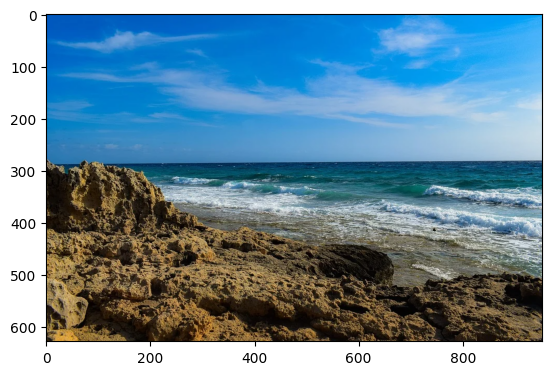

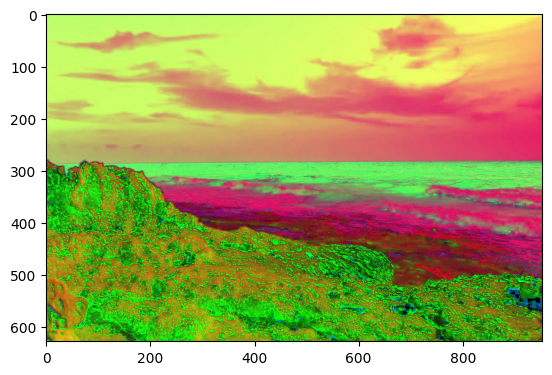

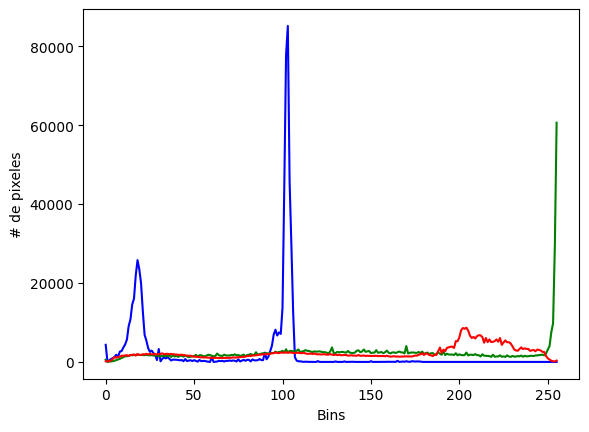

In [80]:
image_path = 'segmentacion.png'
image = cv2.imread(image_path)
plot_image(image)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plot_image(hsv)
hist_color_image(hsv)

[ 17.69960938 158.67378906  99.47273438]


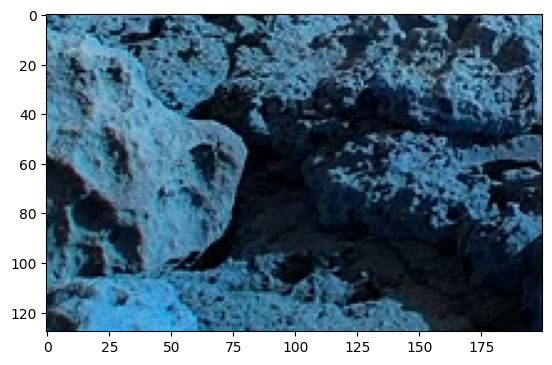

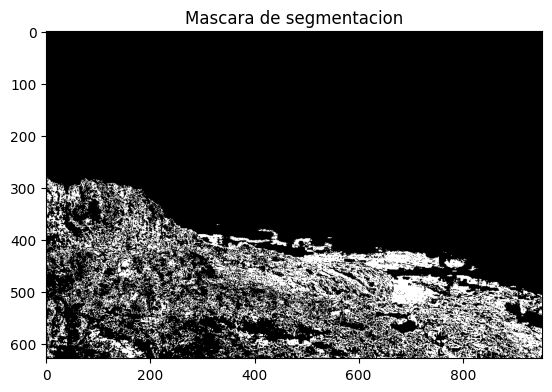

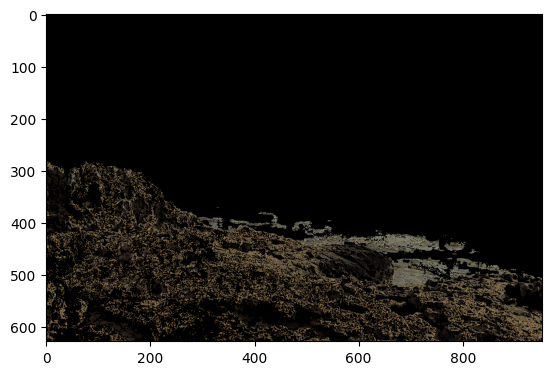

In [81]:
mascara_tierra = mascara(hsv[500:, 0:200, :], image)

[ 97.1303  130.2157  139.05265]


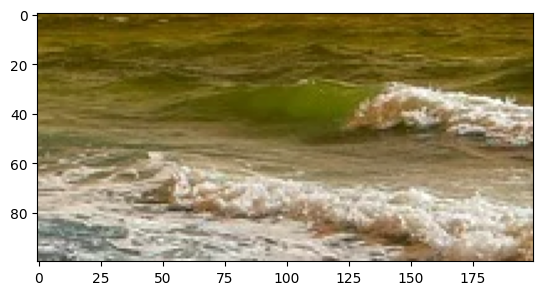

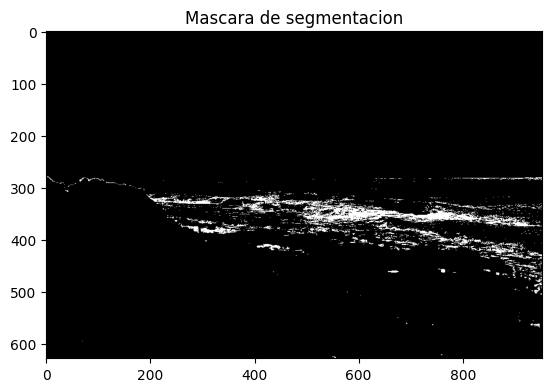

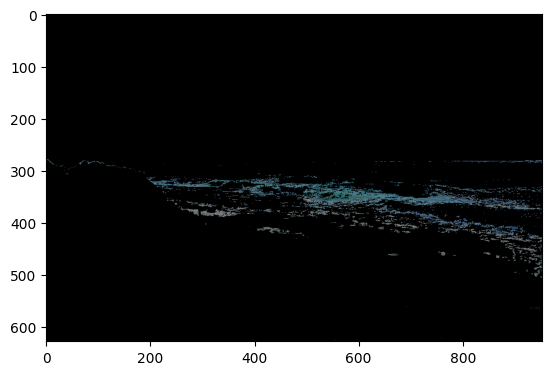

In [82]:
mascara_agua = mascara(hsv[300:400, 600:800, :], image)

[103.2555  247.7386  203.04085]


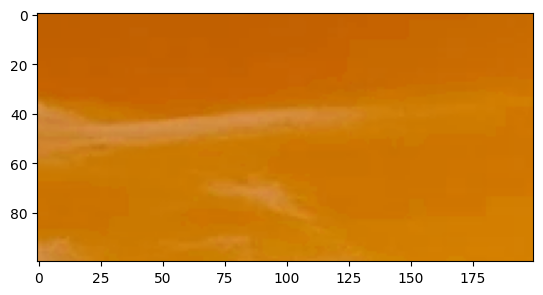

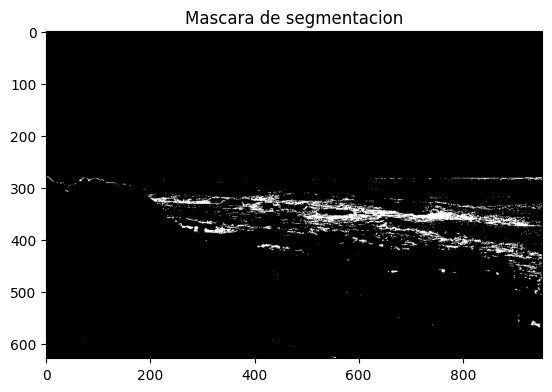

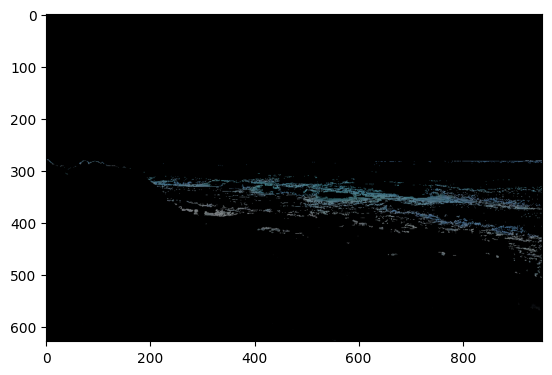

In [83]:
mascara_cielo = mascara(hsv[0:100, 200:400, :], image)